# Pregunta 1


In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 75%; }
    div#menubar-container     { width: 95%; }
    div#maintoolbar-container { width: 65%; }a
</style>
"""))

### Importar librerías

In [2]:
# import libraries 
import pandas as pd 
import numpy as np
import re 
from tqdm import tqdm  # controlar el tiempo en un loop
import os

#plots library
import matplotlib.pyplot as plt
import seaborn as sns

# linear model library
import statsmodels.api as sm # linear regression utiliza todas las columnas de base de datos 
import statsmodels.formula.api as smf  # linear regression usa uan formula
from sklearn.metrics import mean_squared_error, r2_score
from pystout import pystout

#warnings library
import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

#export latex table library
from pystout import pystout

### Cargar Base

In [3]:
repdata = pd.read_stata(r"../datos/mss_repdata.dta",
          convert_categoricals=False) # convert_categoricals=False: No se lee las etiquetas de valor 

repdata.head(7) #panel de datos de 41 países de africa

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.5,0.500712,1.0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.5,0.500712,1.0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.5,0.500712,1.0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.5,0.500712,1.0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.5,0.500712,1.0
5,540.0,1986-01-01,Angola,AGO,1184.884277,974.396118,992.536255,0.216019,-0.018277,-0.103502,...,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.5,0.500712,1.0
6,540.0,1987-01-01,Angola,AGO,1062.246826,1184.884277,974.396118,-0.103502,0.216019,0.147912,...,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.5,0.500712,1.0


### 1. Estadísticas descriptivas
• Exportar en latex una tabla de estadísticas (media, desviación estándar y total de observaciones) de las variables: 
<ul>
<li>NDVI_g (Tasa de variación del índice de vegetación) </li>
<li>tot 100 (términos de intercambio)</li>
<li>trade pGDP (porcentaje de las exportaciones recpecto al PBI)</li>
<li>pop den rur (Densidad poblacional rural)</li>
<li>land crop (porcentaje de tierra cultivable en uso)</li>   
<li>va agr (Valor agregado del sector agrícultura respecto PBI)</li>  
<li>va ind manf (Valor agregado del sector manufacturero respecto PBI)</li> 
</ul>

In [4]:
#1.1. Seleccionamos las variables para las estadísticas descriptivas
table1 = repdata.loc[:,["NDVI_g", "tot_100", "trade_pGDP","pop_den_rur", "land_crop", "va_agr", "va_ind_manf"]]
table1

,NDVI_g,tot_100,trade_pGDP,pop_den_rur,land_crop,va_agr,va_ind_manf
0,NaN,NaN,NaN,197.384522,0.401059,NaN,NaN
1,NaN,NaN,NaN,202.516861,0.401059,NaN,NaN
2,-0.032181,NaN,NaN,207.917908,0.401059,NaN,NaN
3,0.011718,NaN,NaN,213.458649,0.401059,NaN,NaN
4,0.043623,127.930000,61.056736,218.983582,0.401059,13.548707,9.695752
...,...,...,...,...,...,...,...
738,-0.022146,100.000000,79.156792,254.089279,0.336048,15.235192,21.795248
739,0.192235,100.100000,72.069618,249.467636,0.336048,21.771107,18.780670
740,0.048942,109.650000,82.205071,244.998810,0.336048,18.934082,18.007488
741,-0.067663,108.990000,93.679726,249.493622,0.336048,21.788530,16.627857


In [5]:
#1.2. Seleccionamos los estadísticos de interés: media, error estándar y cantidad de observaciones

summary_table = table1.describe().loc[["mean","std","count"]].T
summary_table

,mean,std,count
NDVI_g,0.009282,0.093208,646.0
tot_100,109.877568,34.684560,668.0
trade_pGDP,64.252421,34.291007,698.0
pop_den_rur,324.816053,193.093648,720.0
land_crop,1.979464,3.373026,701.0
va_agr,32.181401,15.166560,702.0
va_ind_manf,11.117373,6.262198,669.0


In [6]:
#1.3. Generar las etiquetas de las variables

new_names = ["Tasa de variación del índice de vegetación",
"Términos de Intercambio",  
"Porcentaje de las exportaciones respecto al PBI",
"Densidad poblacional rural",
"Porcentaje de tierra cultivable en uso",
"Valor agregado del sector agrícultura respecto PBI",
"Valor agregado del sector manufacturero respecto PBI"]

# unión de listas bajo la estructura diccionario
dict( zip( table1.columns, new_names) )
index = dict( zip( table1.columns, new_names) )

In [7]:
#1.4. Exportar a latex
columns = {"mean": "Media",  "std": "Desviación Estándar",  "count": "Total Obv.",}
formatters = { "mean": "{:.2f}".format, "std": "{:.2f}".format,  "count": "{:.0f}".format,}

#1.5 Renombrar tabla de estadisticas con lo indicado en 1.4.
summary_table.rename(index=index,columns=columns,inplace=True) 
summary_table

,Media,Desviación Estándar,Total Obv.
Tasa de variación del índice de vegetación,0.009282,0.093208,646.0
Términos de Intercambio,109.877568,34.684560,668.0
Porcentaje de las exportaciones respecto al PBI,64.252421,34.291007,698.0
Densidad poblacional rural,324.816053,193.093648,720.0
Porcentaje de tierra cultivable en uso,1.979464,3.373026,701.0
Valor agregado del sector agrícultura respecto PBI,32.181401,15.166560,702.0
Valor agregado del sector manufacturero respecto PBI,11.117373,6.262198,669.0


In [8]:
#1.6. Generar la tabla con opciones personalizadas en formato de latex

summary_table.style.format(subset="Media", precision=2).format(subset="Desviación Estándar", precision=2)\
.format(subset="Total Obv.", precision=0)\
.to_latex("summary3.tex", caption="Estadisticas descriptivas", 
           column_format = "lccc") 


### 2. REGRESIÓN
• Replicar la tabla 3 (pág 737): 
<ul>
<li>Variable endógena 'Y' son:  </li>
    <li>----- primer modelo 'any_prio': conflictos civiles con 25 a 1000 muertos. </li>
    <li>----- segundo modelo 'war_prio'; conflictos civiles con más de 1000 muertos. </li>
<li>Variables explicativas 'x' son: </li>
    <li>----- GPCP g 1: Tasa de variación de las lluvias en el periodo t </li>   
    <li>----- GPCP g l 2: Tasa de variación de las lluvias en el periodo t − 1 </li>  
    <li>----- Incluir country trend y efectos fijos a nivel país.</li> 
</ul>

In [9]:
#INLCUIR EFECTOS FIJOS: 
   #Si no se incluye los efectos fijos entonces se genera sesgo por 
   #variables no observables omitidas

#### 2.1. Efectos fijos por país
<ul>
<li> representa factores históricos, geografía e institucionales de los países, que se mantienen en el tiempo pero no son observables </li>
<li> es una dummy que es 1 cuando es el país x==> para ello se usa ccode que es el identificador de cada país, ya no se crea variable </li>
</ul>  

In [10]:
#A. Efectos fijos

#A.1. Obtener dummies por país
dummys = pd.get_dummies(repdata["ccode"].astype(int), prefix = "ccode", dummy_na=False)

print(dummys.columns, len(dummys.columns))
    #Se comprueba que son 41 los países de África que están en la base.
    #lo que comprueba que las dummies estuvieron bien específicadas con ccode.

Index(['ccode_404', 'ccode_420', 'ccode_432', 'ccode_433', 'ccode_434',
       'ccode_435', 'ccode_436', 'ccode_437', 'ccode_438', 'ccode_439',
       'ccode_450', 'ccode_451', 'ccode_452', 'ccode_461', 'ccode_471',
       'ccode_475', 'ccode_481', 'ccode_482', 'ccode_483', 'ccode_484',
       'ccode_490', 'ccode_500', 'ccode_501', 'ccode_510', 'ccode_516',
       'ccode_517', 'ccode_520', 'ccode_522', 'ccode_530', 'ccode_540',
       'ccode_541', 'ccode_551', 'ccode_552', 'ccode_553', 'ccode_560',
       'ccode_565', 'ccode_570', 'ccode_571', 'ccode_572', 'ccode_580',
       'ccode_625'],
      dtype='object') 41


In [11]:
#A.2 Concatenar data 'dummies por pais' con data principal'repdata' 
        # horizontalmente (axis = 1)
repdata = pd.concat([ repdata , dummys], axis = 1 )
repdata.head(5)
    #Se evidencia que en la data principal están las dummmies por país

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,ccode_551,ccode_552,ccode_553,ccode_560,ccode_565,ccode_570,ccode_571,ccode_572,ccode_580,ccode_625
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0,0,0,0,0,0,0,0,0,0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0,0,0,0,0,0,0,0,0,0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0,0,0,0,0,0,0,0,0,0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0,0,0,0,0,0,0,0,0,0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0,0,0,0,0,0,0,0,0,0


#### 2.2. Country trend: Efectos fijos por el tiempo
<ul>
<li>Multiplicación de las 'dummy de país' x  'variable temporal' </li>
<li>Country trend busca capturar las variables omitidas variantes en el tiempo en cada país. </li> 
</ul>

In [12]:
#B. Country trend: Efectos fijos por el tiempo

# B.1 creando la variable temporal
repdata['time_year'] = pd.DatetimeIndex(repdata['year']).year - 1978
repdata['time_year']

0       3
1       4
2       5
3       6
4       7
       ..
738    17
739    18
740    19
741    20
742    21
Name: time_year, Length: 743, dtype: int64

In [13]:
# B.2. Construir variable country trend = dummies por país x variable temporal
i = 0

while i < 41:  # 41 por el tema de indexing pues en python la posición inicial es cero. 
    var = dummys.columns[i]+"_"+"time"  # creamos el nombre de cada variable
    repdata[var]  = repdata[dummys.columns[i]]*repdata["time_year"] 
    
    # multiplicacón de variables: dummy país * variable temporal

    i = i + 1
    
# observamos para país y la variable temporal. 

repdata[['ccode','time_year']].iloc[0:40,:]

,ccode,time_year
0,540.0,3
1,540.0,4
2,540.0,5
3,540.0,6
4,540.0,7
5,540.0,8
6,540.0,9
7,540.0,10
8,540.0,11
9,540.0,12


In [14]:
#B.3. Extraer nombre de variables que terminan con _time
index_columns = np.where(repdata.columns.str.contains('_time$'))[0]

country_trend = repdata.columns[index_columns] #nombres de variables que terminan en _time
                                               #(representan las dummies temporal)
country_trend #nombres de variables que terminan en _time

Index(['ccode_404_time', 'ccode_420_time', 'ccode_432_time', 'ccode_433_time',
       'ccode_434_time', 'ccode_435_time', 'ccode_436_time', 'ccode_437_time',
       'ccode_438_time', 'ccode_439_time', 'ccode_450_time', 'ccode_451_time',
       'ccode_452_time', 'ccode_461_time', 'ccode_471_time', 'ccode_475_time',
       'ccode_481_time', 'ccode_482_time', 'ccode_483_time', 'ccode_484_time',
       'ccode_490_time', 'ccode_500_time', 'ccode_501_time', 'ccode_510_time',
       'ccode_516_time', 'ccode_517_time', 'ccode_520_time', 'ccode_522_time',
       'ccode_530_time', 'ccode_540_time', 'ccode_541_time', 'ccode_551_time',
       'ccode_552_time', 'ccode_553_time', 'ccode_560_time', 'ccode_565_time',
       'ccode_570_time', 'ccode_571_time', 'ccode_572_time', 'ccode_580_time',
       'ccode_625_time'],
      dtype='object')

#### 2.3. Estimación de modelos

#### Modelo con any_prio (conflictos civiles con menos de 1000 muertos)

In [15]:
#             Modelo 1
#-----------------------------------
y = repdata['any_prio'] # nuevo vector de la variable Y (any prio)

In [16]:
#Mostrar formula de regresion que se usará con any_prio
formula_model1 = "any_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )
formula_model1

'any_prio ~ GPCP_g + GPCP_g_l + C(ccode) + ccode_404_time + ccode_420_time + ccode_432_time + ccode_433_time + ccode_434_time + ccode_435_time + ccode_436_time + ccode_437_time + ccode_438_time + ccode_439_time + ccode_450_time + ccode_451_time + ccode_452_time + ccode_461_time + ccode_471_time + ccode_475_time + ccode_481_time + ccode_482_time + ccode_483_time + ccode_484_time + ccode_490_time + ccode_500_time + ccode_501_time + ccode_510_time + ccode_516_time + ccode_517_time + ccode_520_time + ccode_522_time + ccode_530_time + ccode_540_time + ccode_541_time + ccode_551_time + ccode_552_time + ccode_553_time + ccode_560_time + ccode_565_time + ccode_570_time + ccode_571_time + ccode_572_time + ccode_580_time + ccode_625_time'

In [17]:
#Estimación con y=any_prio
ols_model1 = smf.ols(formula_model1, data=repdata).fit(cov_type='cluster',
                                                 cov_kwds={'groups': repdata['ccode']})
print(ols_model1.summary())  #TABLA COMPLETA
    #se usa Hubert robust: cov_type
    #las perturbaciones están agrupadas por niveles: cov_kwds, por grupos de países

                            OLS Regression Results                            
Dep. Variable:               any_prio   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           6.28e-20
Time:                        12:30:53   Log-Likelihood:                 8.6565
No. Observations:                 743   AIC:                             150.7
Df Residuals:                     659   BIC:                             538.0
Df Model:                          83                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2458      0.00

In [18]:
model1=ols_model1.summary2().tables[1] #solo las estimaciones de los coeficientes
model1

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-0.245845,0.003671,-66.965163,0.000000e+00,-0.253041,-0.238650
C(ccode)[T.420.0],0.492085,0.001049,468.956054,0.000000e+00,0.490029,0.494142
C(ccode)[T.432.0],0.259995,0.007963,32.650975,7.761876e-234,0.244388,0.275602
C(ccode)[T.433.0],-0.098577,0.001671,-59.006641,0.000000e+00,-0.101851,-0.095302
C(ccode)[T.434.0],0.243756,0.004211,57.887597,0.000000e+00,0.235503,0.252009
...,...,...,...,...,...,...
ccode_570_time,0.014155,0.000141,100.113319,0.000000e+00,0.013878,0.014432
ccode_571_time,0.000222,0.000147,1.505819,1.321136e-01,-0.000067,0.000510
ccode_572_time,-0.000146,0.000058,-2.521110,1.169852e-02,-0.000259,-0.000032
ccode_580_time,-0.000180,0.000165,-1.087092,2.769961e-01,-0.000504,0.000144


In [19]:
# Guardar Root mean square error
rmse_ol1 = round(mean_squared_error( y, ols_model1.predict())**0.5,2)
print(rmse_ol1)

0.24


#### Modelo con war_prio (guerra civil con más de 1000 muertos)

In [20]:
#             Modelo 2
#-----------------------------------
y = repdata['war_prio']

In [21]:
formula_model2 = "war_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )
formula_model2

'war_prio ~ GPCP_g + GPCP_g_l + C(ccode) + ccode_404_time + ccode_420_time + ccode_432_time + ccode_433_time + ccode_434_time + ccode_435_time + ccode_436_time + ccode_437_time + ccode_438_time + ccode_439_time + ccode_450_time + ccode_451_time + ccode_452_time + ccode_461_time + ccode_471_time + ccode_475_time + ccode_481_time + ccode_482_time + ccode_483_time + ccode_484_time + ccode_490_time + ccode_500_time + ccode_501_time + ccode_510_time + ccode_516_time + ccode_517_time + ccode_520_time + ccode_522_time + ccode_530_time + ccode_540_time + ccode_541_time + ccode_551_time + ccode_552_time + ccode_553_time + ccode_560_time + ccode_565_time + ccode_570_time + ccode_571_time + ccode_572_time + ccode_580_time + ccode_625_time'

In [22]:
#Estimación, Modelo de regresión con war_prio
ols_model2 = smf.ols(formula_model2, data=repdata).fit(cov_type='cluster',
                                                 cov_kwds={'groups': repdata['ccode']})
print(ols_model2.summary())  #RESULTADO FINAL
    #se usa Hubert robust: cov_type
    #las perturbaciones están agrupadas por niveles: cov_kwds, por países

                            OLS Regression Results                            
Dep. Variable:               war_prio   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     335.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.01e-25
Time:                        12:30:57   Log-Likelihood:                 124.86
No. Observations:                 743   AIC:                            -81.72
Df Residuals:                     659   BIC:                             305.6
Df Model:                          83                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1101      0.00

In [23]:
model2=ols_model2.summary2().tables[1]
model2

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-0.110119,0.002447,-45.001513,0.000000e+00,-0.114916,-0.105323
C(ccode)[T.420.0],0.114857,0.000575,199.754284,0.000000e+00,0.113730,0.115983
C(ccode)[T.432.0],0.103349,0.005373,19.234850,1.890891e-82,0.092818,0.113880
C(ccode)[T.433.0],-0.002288,0.001034,-2.213479,2.686465e-02,-0.004314,-0.000262
C(ccode)[T.434.0],0.109586,0.002710,40.430691,0.000000e+00,0.104274,0.114899
...,...,...,...,...,...,...
ccode_570_time,-0.000126,0.000089,-1.418921,1.559221e-01,-0.000301,0.000048
ccode_571_time,0.000232,0.000101,2.298118,2.155509e-02,0.000034,0.000429
ccode_572_time,-0.000048,0.000031,-1.523572,1.276157e-01,-0.000109,0.000014
ccode_580_time,-0.000256,0.000115,-2.228624,2.583894e-02,-0.000481,-0.000031


In [24]:
# Guardar Root mean square error
rmse_ol2 = round(mean_squared_error( y, ols_model2.predict())**0.5,2)
print( rmse_ol2  )

0.2


### Exportar regresiones a latex

In [25]:
#_---------------------------------------------------------- 
#                    EXPORTAR EN LATEX 
#_---------------------------------------------------------- 

# Lista de explicativa a mostrarse en la tabla

explicativas = ['GPCP_g','GPCP_g_l']

# etiquetas a las variables 

etiquetas = ['Growth in rainfall, t','Growth in rainfall, t-1']

labels = dict(zip(explicativas,etiquetas))
labels

{'GPCP_g': 'Growth in rainfall, t', 'GPCP_g_l': 'Growth in rainfall, t-1'}

In [26]:
pystout(models = [ols_model1,ols_model2], file='regression_table1.tex', digits=3,
        endog_names=['Civil Conflict 25 Death (1)','Civil Conflict 1000 Death (2)'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        mgroups={'Ordinary Least Squares':[1,2]}, # titulo a las regresiones
        modstat={'nobs':'Observations','rsquared':'R\sym{2}'}, # estadísticos 
        addrows={'Country fixed effects':['yes','yes'], 'Country-specific time trends' :
                 ['yes','yes'],
                 'Root mean square error': [rmse_ol1,rmse_ol2]}, # añadimos filas 
        addnotes=['Note.—Huber robust standard errors are in parentheses.',
                  'Regression disturbance terms are clustered at the country level.',
                 'A country-specific year time trend is included in all specifications (coefficient estimates not reported).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Rainfall and Civil conflict (Reduced form)',
        stars={.1:'*',.05:'**',.01:'***'}
       )

## 3. Graficar el Coeft plot del coeficiente estimado que corresponde a la variable GPCP g.
- El gráfico debe incluir el coeficiente e intervalo de confianza respectivo de cada modelo.

In [27]:
#3.1. Extraer

# Modelo 1
#...............

#Extraer coeficientes de modelo any_prio
model1_coef = model1.loc['GPCP_g', 'Coef.']
model1_coef_se = model1.loc['GPCP_g', 'Std.Err.']

model1_lower = model1.loc['GPCP_g', '[0.025']
model1_upper = model1.loc['GPCP_g', '0.975]']

# Modelo 2
#...............

#Extraer coeficientes de modelo war_prio
model2_coef = model2.loc['GPCP_g', 'Coef.']
model2_coef_se = model2.loc['GPCP_g', 'Std.Err.']

model2_lower = model2.loc['GPCP_g', '[0.025']
model2_upper = model2.loc['GPCP_g', '0.975]']

In [28]:
#3.2. Construir tabla donde se coloca coeficientes e intervalo de confianza
table = np.zeros( ( 2, 4 ) )

table[0,0] = model1_coef
table[0,1] = model1_coef_se 
table[0,2] = model1_lower
table[0,3] = model1_upper 

table[1,0] = model2_coef
table[1,1] = model2_coef_se  
table[1,2] = model2_lower
table[1,3] = model2_upper 

In [29]:
#3.3. Tabla con estimadores y sus intervalos
    # 3.3.1. Colocar nombres de la tabla
table_pandas = pd.DataFrame( table, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])
table_pandas.index = [ "Civil Conflict 25 Death (1)","Civil Conflict 1000 Death (2)"]
    # 3.3.2. Colocar indices de la tabla
table_pandas.reset_index(inplace = True)
table_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table_pandas.round(8)

,Model,Estimate,Std. Error,Lower_bound,Upper_bound
0,Civil Conflict 25 Death (1),-0.023770,0.043224,-0.108488,0.060948
1,Civil Conflict 1000 Death (2),-0.062476,0.029919,-0.121117,-0.003835


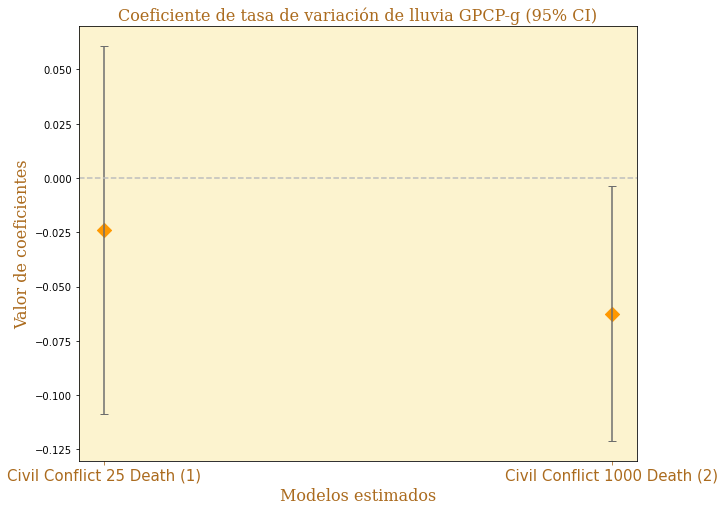

In [30]:
#Tamaño de gráfico
fig, ax = plt.subplots(figsize = (10, 8))  

#Punto de coeficiente
ax.scatter(x = table_pandas['Model'], #va en el eje x
           marker = 'D', s = 100,  # s: modificar tamaño del point, tamaño del punto
           y = table_pandas['Estimate'], color = "#ff9800")  #va en el eje y

#Intervalo de confianza
eb1 = plt.errorbar(x = table_pandas['Model'], y = table_pandas['Estimate'],
                   yerr = 0.5*(table_pandas['Upper_bound'] - table_pandas['Lower_bound']), #construir intervalo
                   color= '#6d6d6d', ls = '', capsize = 4)  #color de lineas de intervalo

                    # ls='': no une los puntos rojos 
#Línea en y=0
plt.axhline(y = 0, color = '#bdbdbd').set_linestyle('--')  # linea horizontal 

#Agregar título y etiquetas
font = {'family': 'serif',
        'color':  '#AB6B1E',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Coeficiente de tasa de variación de lluvia GPCP-g (95% CI)',fontdict=font)
plt.ylabel('Valor de coeficientes', fontdict=font)
plt.xlabel('Modelos estimados', fontdict=font)
ax.xaxis.set_tick_params(labelsize=15)
ax.tick_params(axis='x', colors='#AB6B1E')

#Color de fondo
ax.set_facecolor("#FCF3CF")


In [31]:
#3.5. Guardar figura
fig.savefig(r'../grupo9/imagen_coeficientes.png', dpi=800, bbox_inches='tight') # code to save graph 